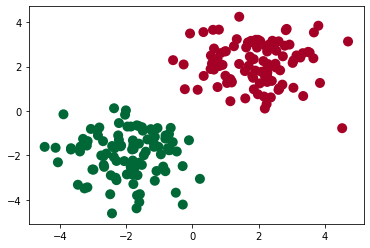

In [1]:
import torch
import matplotlib.pyplot as plt

POINTSNUM = 100                     # 點的數量

# 建立測試資料
n_data = torch.ones(POINTSNUM, 2)   # 建立全為 1 的 100*2 張量(tensor) 分別代表直角坐標(x, y)軸

Coordinate_0 = torch.normal(2*n_data, 1)  # 產生類型0 座標資料
Class_0 = torch.zeros(POINTSNUM)          # 產生類型0 類別資料, 全為 0

Coordinate_1 = torch.normal(-2*n_data, 1) # 產生類型1 座標資料
Class_1 = torch.ones(POINTSNUM)           # 產生類型1 類別資料, 全為 1

# 使用 torch.cat 合併數據
Coordinate = torch.cat((Coordinate_0, Coordinate_1), 0).type(torch.FloatTensor)  # 將兩個類別的 座標資料合併
Class = torch.cat((Class_0, Class_1), ).type(torch.LongTensor)                   # 將兩個類別的 類別資料合併


plt.scatter(Coordinate.data.numpy()[:, 0], Coordinate.data.numpy()[:, 1], c=Class.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [2]:
import torch
import torch.nn.functional as F     # 激勵函數

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定義各層樣式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # nn.Linear(輸入二維張量大小, 輸出二維張量大小)
        self.out = torch.nn.Linear(n_hidden, n_output)       # 上一級的輸出為這級的輸入

    def forward(self, x):
        # 正向傳播輸入值, 神经網路分析出输出值
        x = F.relu(self.hidden(x))      # 激勵函數
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x
                                                 # 類別術
net = Net(n_feature=2, n_hidden=10, n_output=2)  # 輸入特徵 : 2, 神經元個數 : 10, 輸出特徵 : 2

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


c:\users\kaineng\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


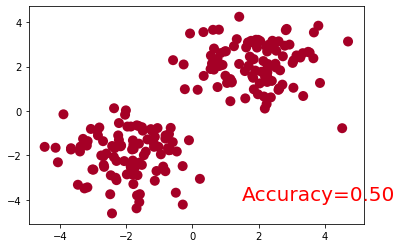

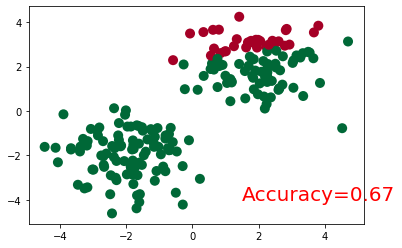

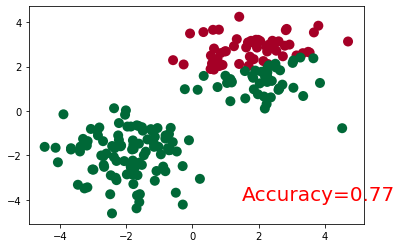

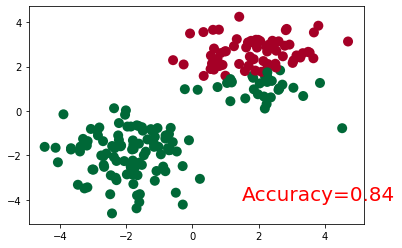

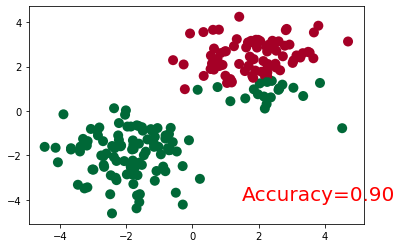

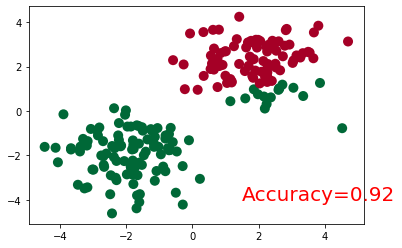

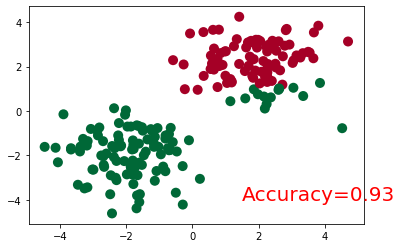

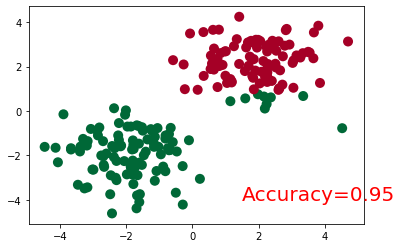

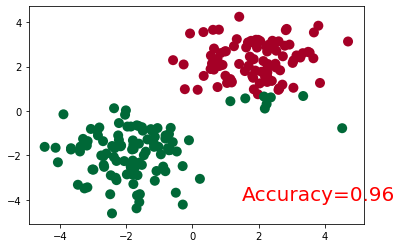

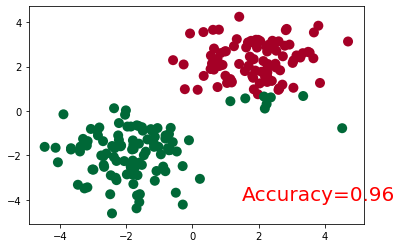

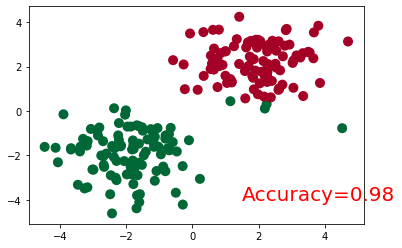

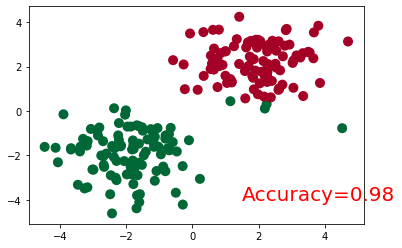

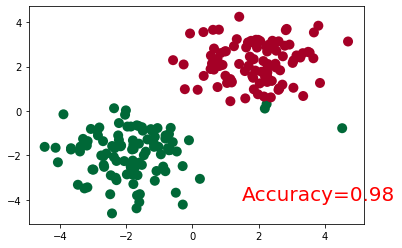

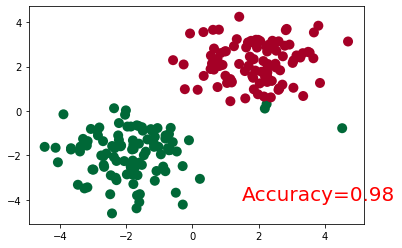

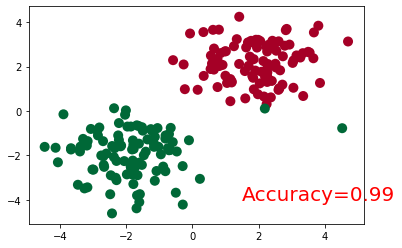

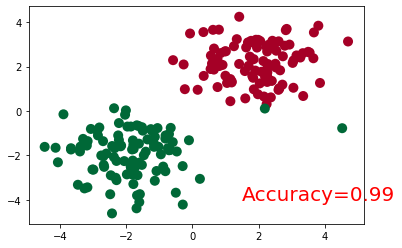

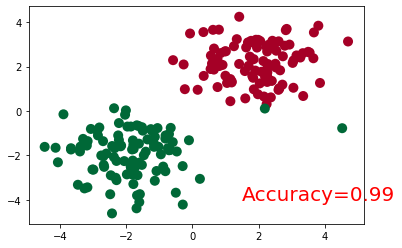

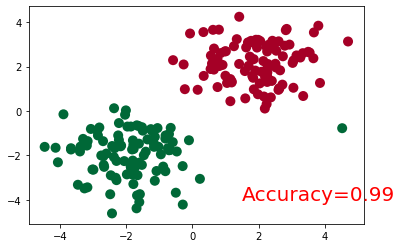

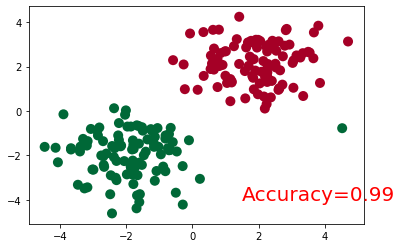

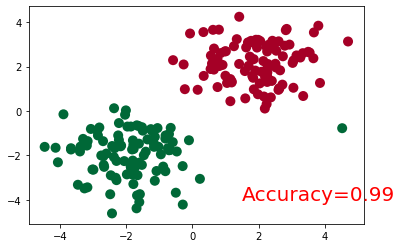

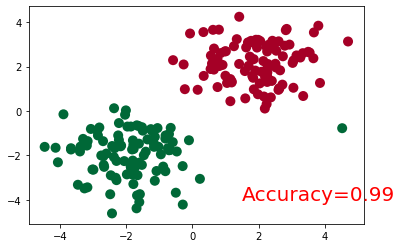

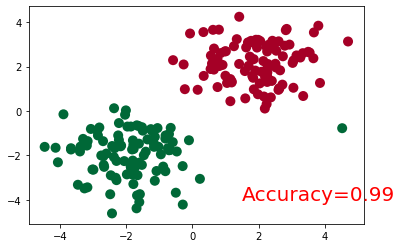

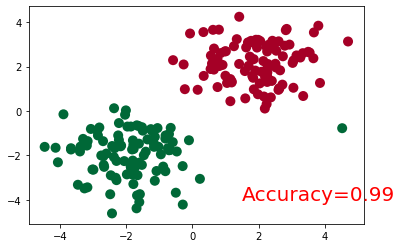

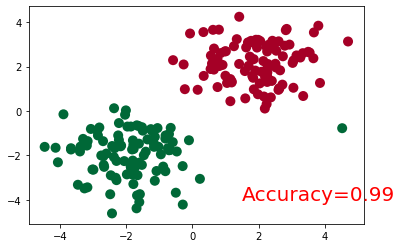

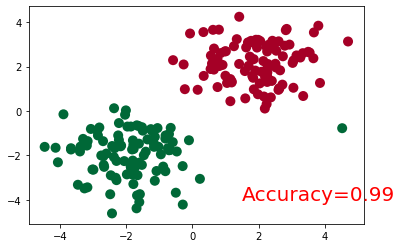

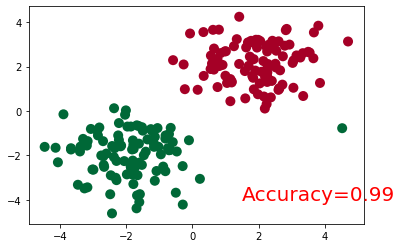

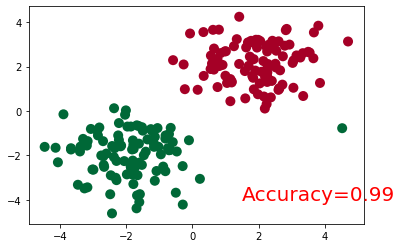

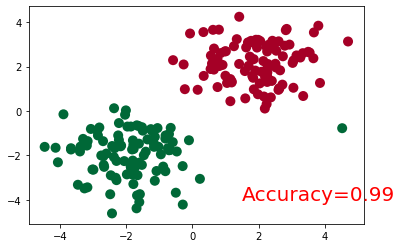

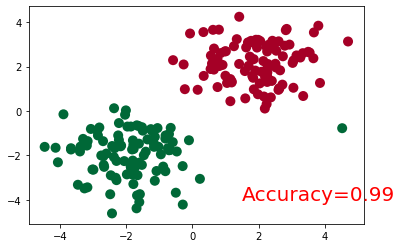

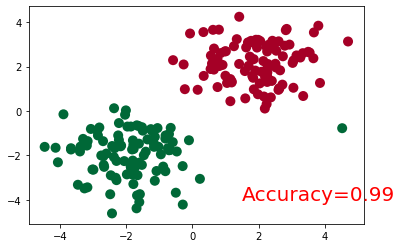

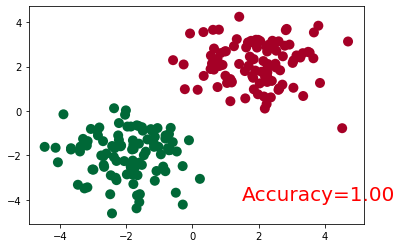

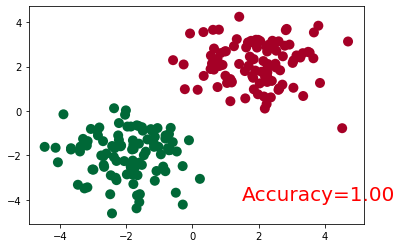

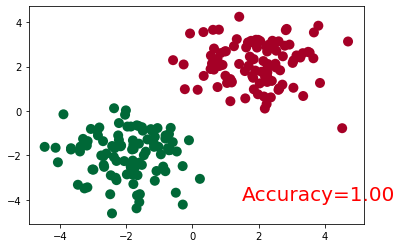

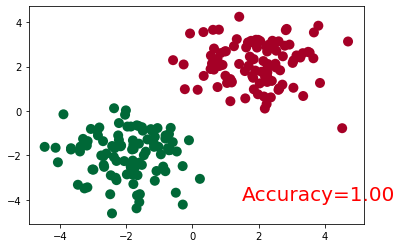

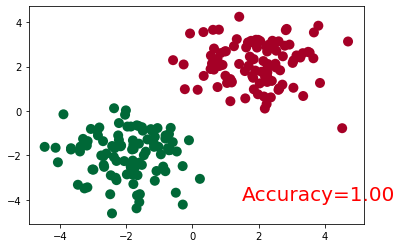

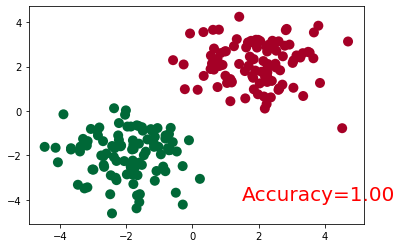

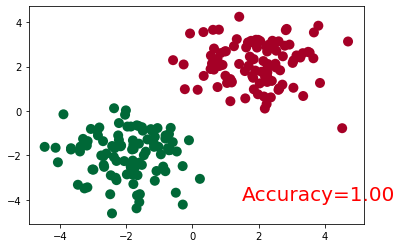

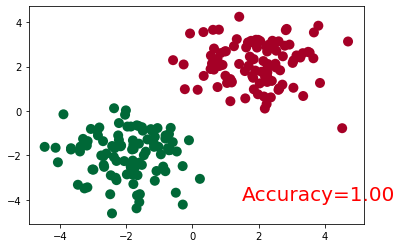

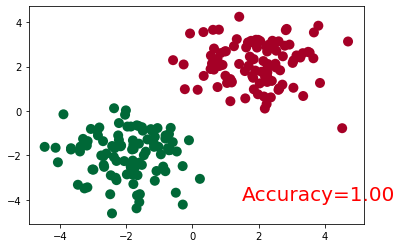

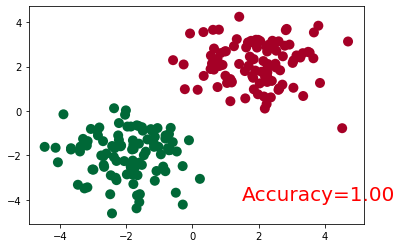

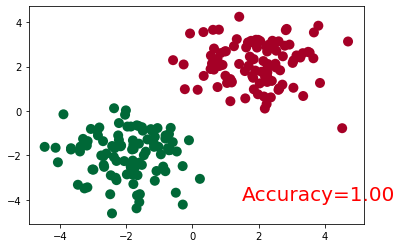

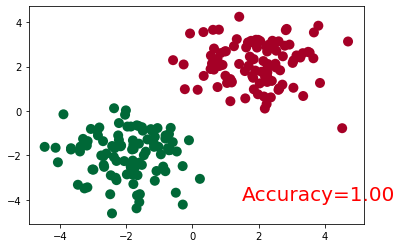

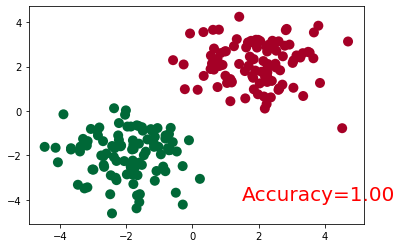

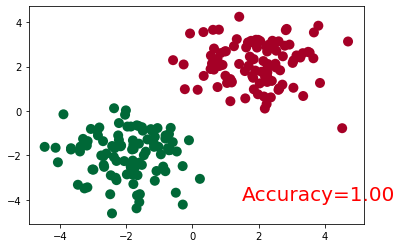

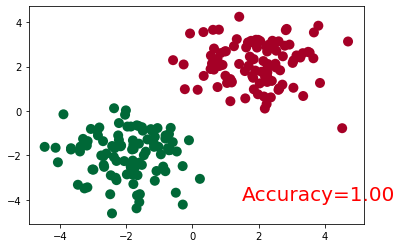

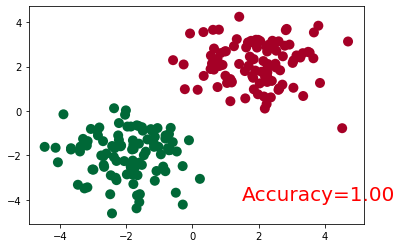

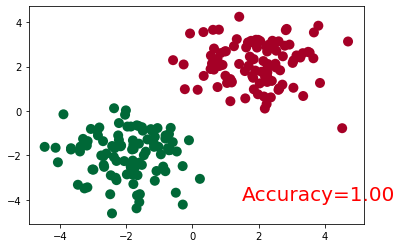

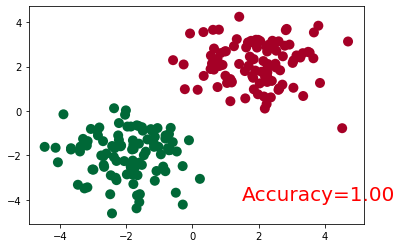

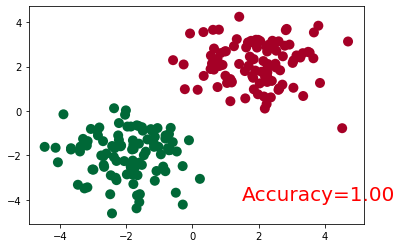

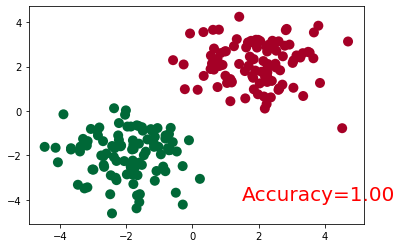

In [3]:
import matplotlib.pyplot as plt

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()   # 画图
plt.show()

for t in range(100):
    out = net(Coordinate)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, Class)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()
    optimizer.step()

    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_Class = prediction.data.numpy().squeeze()
        target_Class = Class.data.numpy()
        plt.scatter(Coordinate.data.numpy()[:, 0], Coordinate.data.numpy()[:, 1], c=pred_Class, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_Class == target_Class)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()